In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# House Price Prediction

## Step 1.1: Install required packages (run this in your terminal/command prompt)

## Step 1.2: Import all necessary libraries

In [3]:
# pip install pandas scikit-learn matplotlib seaborn xgboost streamlit shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Step 1.3: Load the California Housing dataset

In [4]:

print("📊 Loading California Housing Dataset...")
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')


📊 Loading California Housing Dataset...


# Step 1.4: Display basic dataset information

In [6]:
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset shape: {X.shape}")
print(f"Target variable: {y.name}")
print(f"Features: {list(X.columns)}")

print("\nFirst 5 rows of features:")
print(X.head())

print("\nTarget variable summary:")
print(y.describe())



DATASET OVERVIEW
Dataset shape: (20640, 8)
Target variable: MedHouseVal
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of features:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target variable summary:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


## Step 1.5: Combine features and target for initial exploration

In [10]:
df = X.copy()
df['MedHouseVal'] = y

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Basic Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##  STEP 2: Exploratory Data Analysis & Visualization

📈 Creating Feature Distributions...


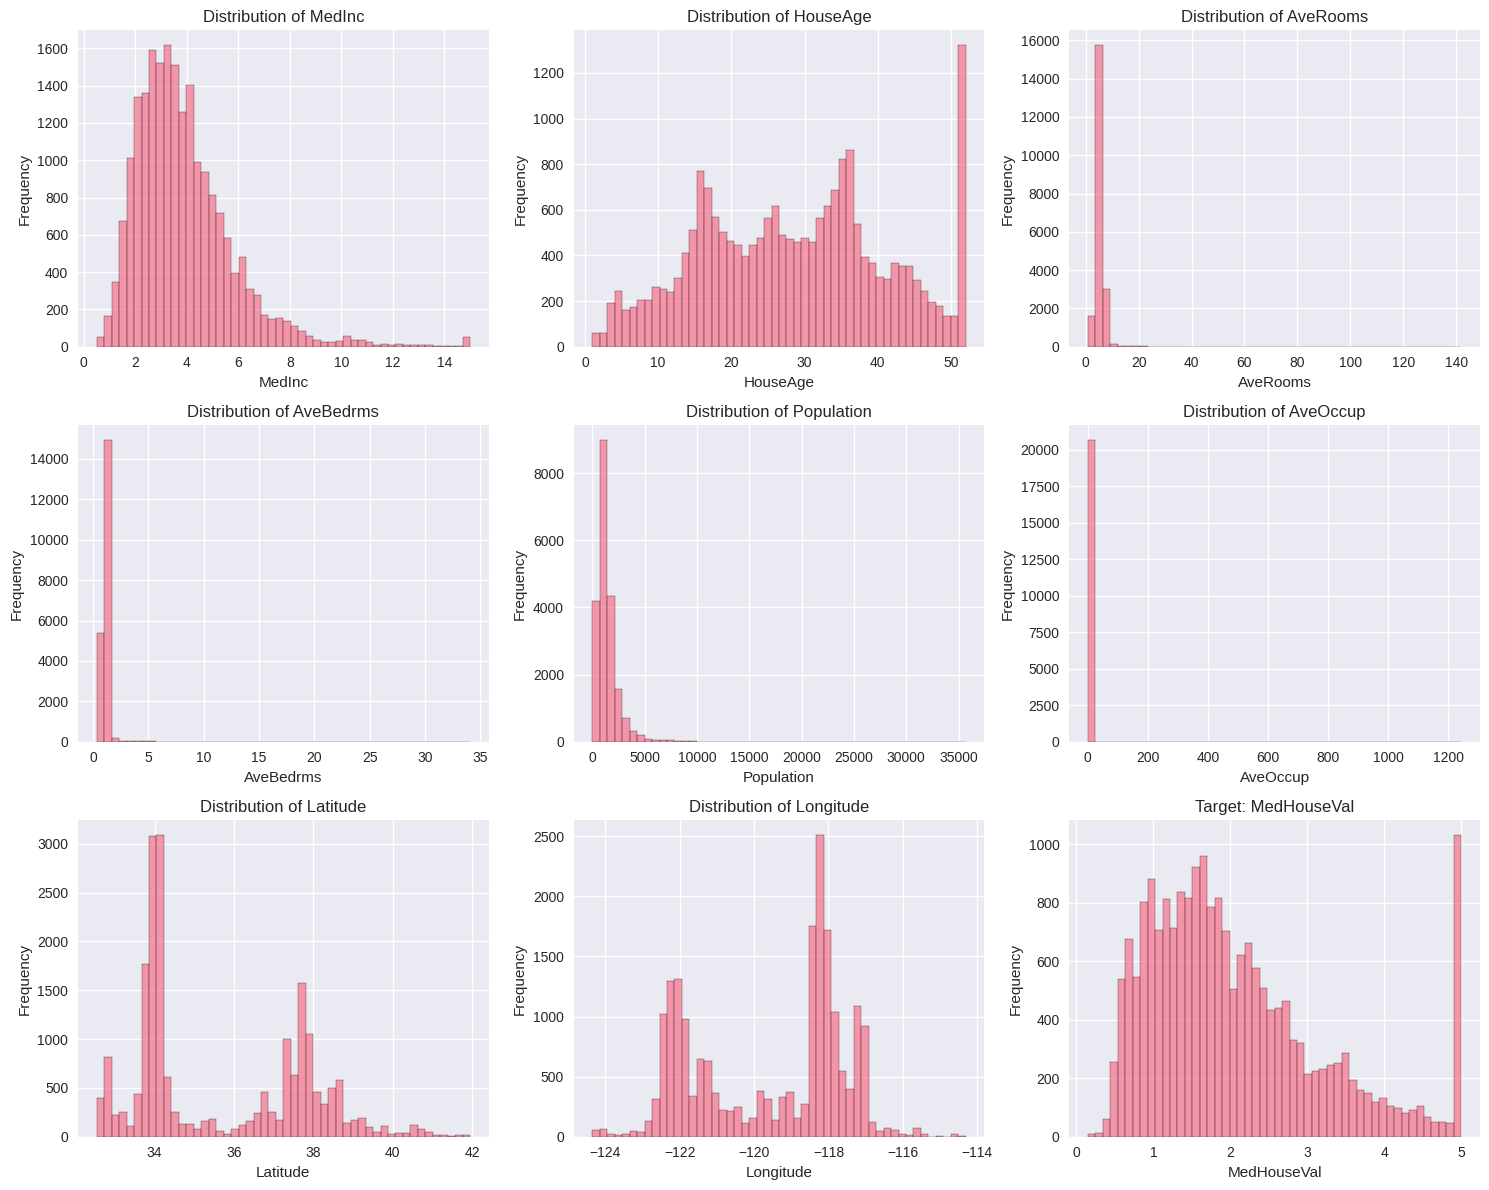


🔍 Analyzing Feature Correlations...


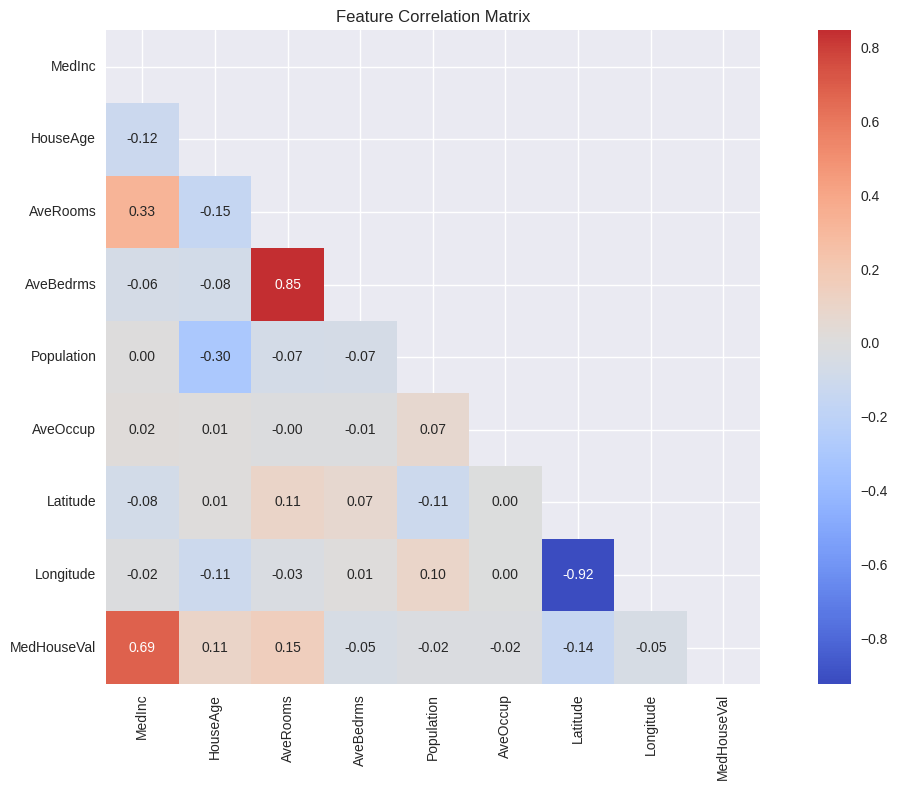


🗺️ Creating Geographic Distribution...


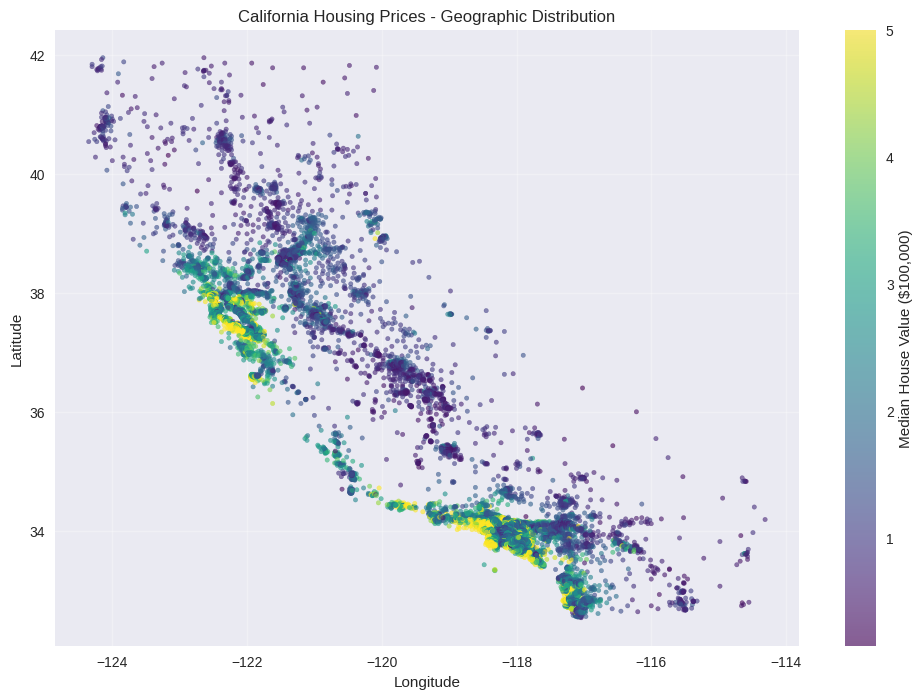


📊 Analyzing Key Feature Relationships...


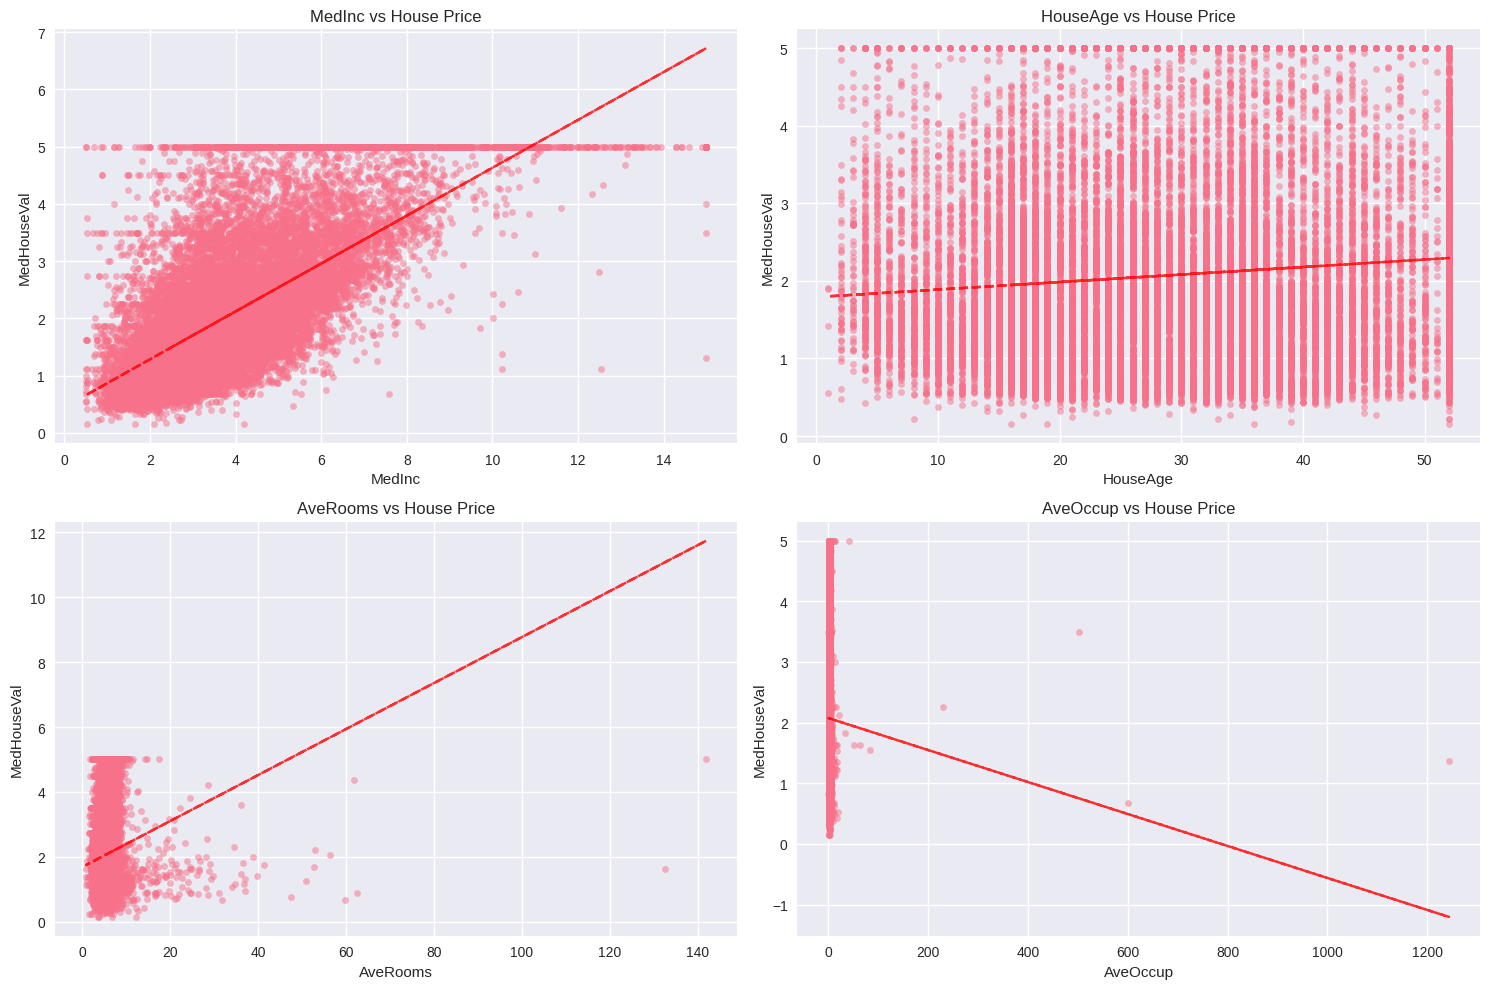


🚨 Checking for Outliers...


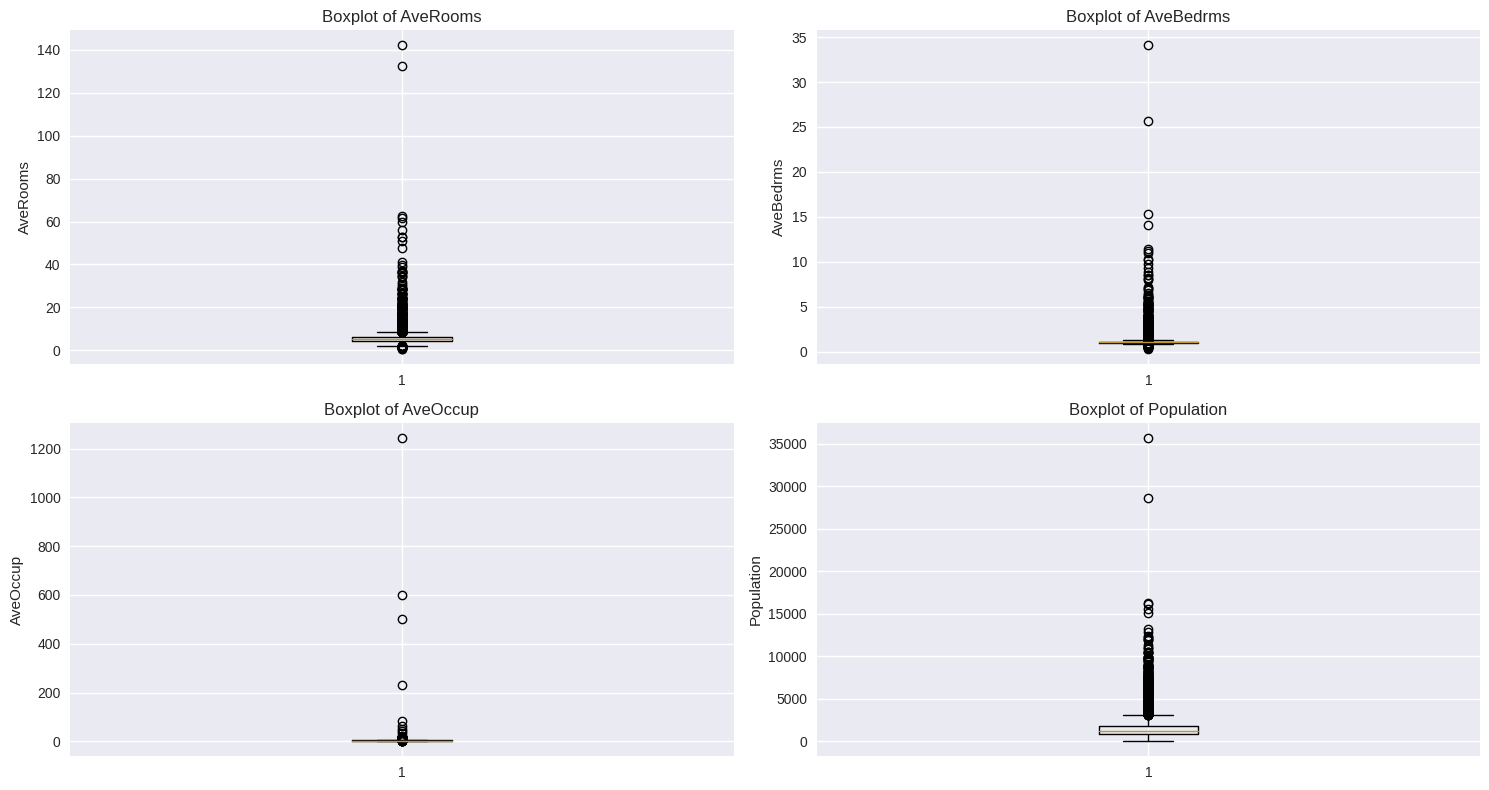


📋 Outlier Analysis Summary:
AveRooms: 511 outliers (2.48%)
AveBedrms: 1424 outliers (6.90%)
AveOccup: 711 outliers (3.44%)
Population: 1196 outliers (5.79%)

✅ Data Quality Check:
Missing values: 0
Duplicate rows: 0
Data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [11]:
# Step 2.1: Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Step 2.2: Create distribution plots for all features
print("📈 Creating Feature Distributions...")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    if column == 'MedHouseVal':
        axes[i].hist(df[column], bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Target: {column}')
    else:
        axes[i].hist(df[column], bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 2.3: Correlation matrix
print("\n🔍 Analyzing Feature Correlations...")
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Step 2.4: Geographic visualization (California map)
print("\n🗺️ Creating Geographic Distribution...")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='viridis', 
                     alpha=0.6, s=10)
plt.colorbar(scatter, label='Median House Value ($100,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices - Geographic Distribution')
plt.grid(True, alpha=0.3)
plt.show()

# Step 2.5: Relationship between key features and target
print("\n📊 Analyzing Key Feature Relationships...")
key_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].scatter(df[feature], df['MedHouseVal'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MedHouseVal')
    axes[i].set_title(f'{feature} vs House Price')
    # Add trend line
    z = np.polyfit(df[feature], df['MedHouseVal'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Step 2.6: Outlier detection and analysis
print("\n🚨 Checking for Outliers...")
outlier_features = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(outlier_features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Step 2.7: Statistical summary of potential outliers
print("\n📋 Outlier Analysis Summary:")
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# Step 2.8: Data quality check
print("\n✅ Data Quality Check:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Data types:\n{df.dtypes}")

🔧 Starting Advanced Feature Engineering...

📊 Handling outliers using winsorization...
AveRooms: Winsorized (5% each side) - Reduced extreme values
AveBedrms: Winsorized (5% each side) - Reduced extreme values
AveOccup: Winsorized (5% each side) - Reduced extreme values
Population: Winsorized (5% each side) - Reduced extreme values

🗺️ Creating advanced geographic features...

📐 Creating ratio and composite features...

🔄 Creating polynomial and interaction features...

📍 Creating geographic clusters...

⚖️ Preparing features for scaling...

FEATURE ENGINEERING SUMMARY
Original features: 8
Engineered features: 21
Total features after engineering: 21
Feature matrix shape: (20640, 21)

New feature categories:
📍 Geographic features: 5 features
📐 Ratio features: 3 features
🔄 Polynomial/Interaction: 5 features
📊 Winsorized features: 4 features

Top 10 most correlated new features with target:
  income_per_room: 0.692
  MedInc: 0.688
  income_rooms_interaction: 0.633
  MedInc_squared: 0.625


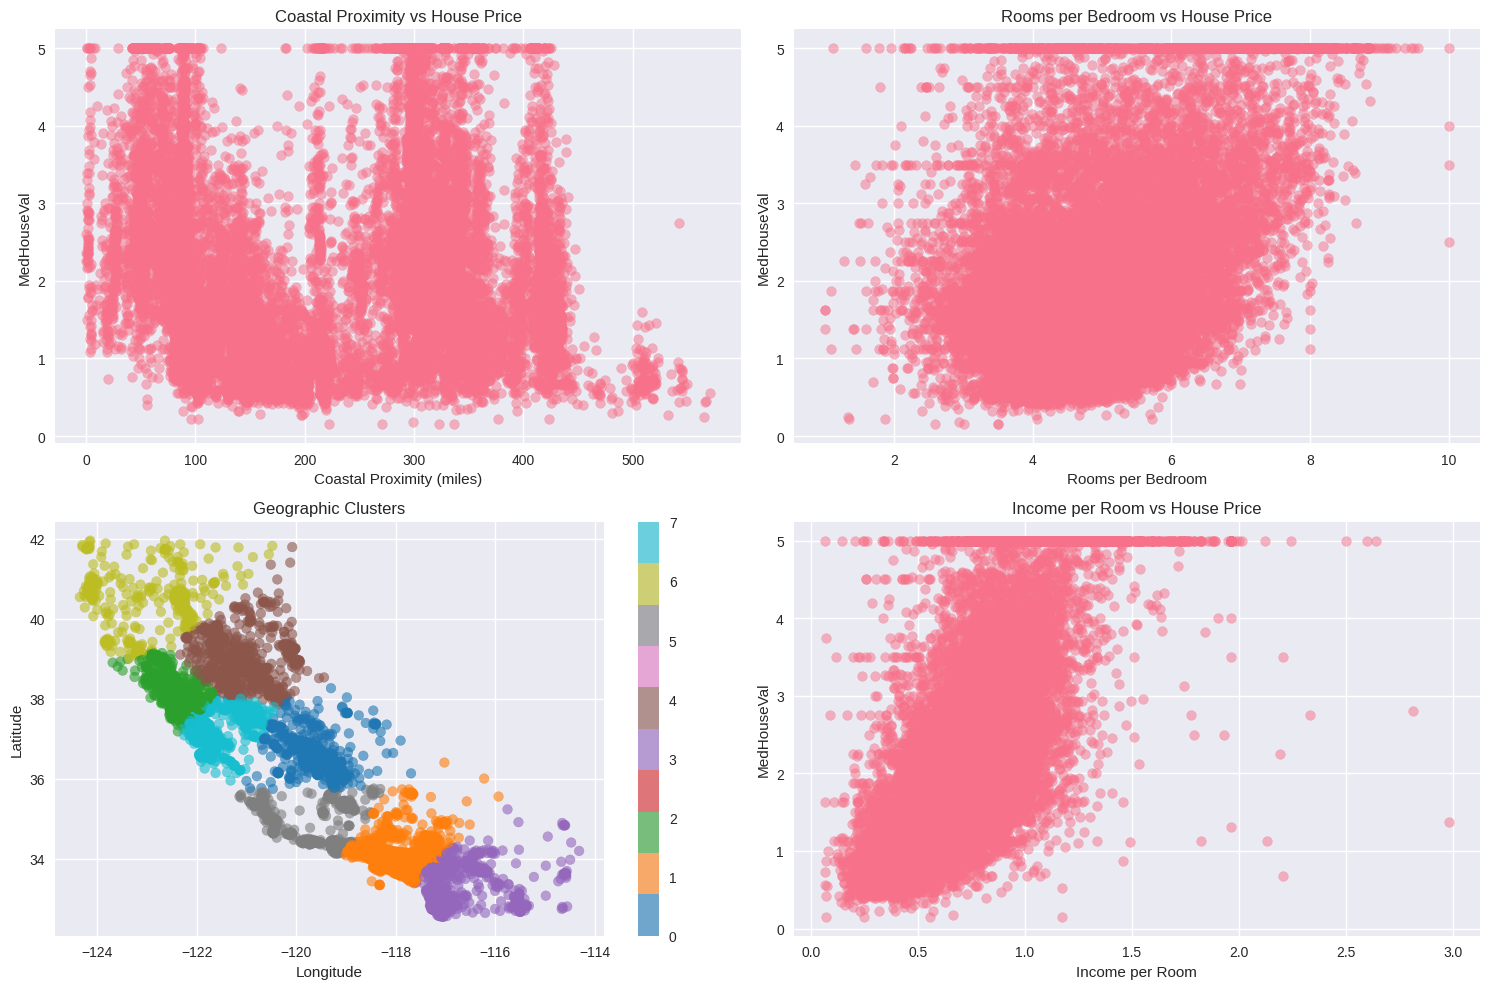


✅ Feature engineering completed successfully!
🎯 Ready for modeling with 21 features


In [12]:
# Step 3.1: Create a copy for feature engineering
df_engineered = df.copy()
print("🔧 Starting Advanced Feature Engineering...")

# Step 3.2: Handle outliers using winsorization
from scipy.stats.mstats import winsorize

print("\n📊 Handling outliers using winsorization...")
outlier_columns = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

for col in outlier_columns:
    original_shape = df_engineered[col].shape
    df_engineered[f'{col}_win'] = winsorize(df_engineered[col], limits=[0.05, 0.05])
    print(f"{col}: Winsorized (5% each side) - Reduced extreme values")

# Step 3.3: Create geographic features
print("\n🗺️ Creating advanced geographic features...")

# Distance to major California cities (approximate coordinates)
major_cities = {
    'LA': (34.05, -118.24),
    'SF': (37.77, -122.42),
    'SD': (32.72, -117.16),
    'SJ': (37.34, -121.89)
}

def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate distance in miles
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2) * 69

for city, (city_lat, city_lon) in major_cities.items():
    df_engineered[f'dist_to_{city}'] = calculate_distance(
        df_engineered['Latitude'], df_engineered['Longitude'], 
        city_lat, city_lon
    )

# Coastal proximity (simplified - distance to approximate coastline)
coast_lat, coast_lon = 36.60, -121.90  # Approximate central coast point
df_engineered['coastal_proximity'] = calculate_distance(
    df_engineered['Latitude'], df_engineered['Longitude'], 
    coast_lat, coast_lon
)

# Step 3.4: Create ratio and composite features
print("\n📐 Creating ratio and composite features...")

# Room to bedroom ratio
df_engineered['rooms_per_bedroom'] = df_engineered['AveRooms'] / df_engineered['AveBedrms']
df_engineered['rooms_per_bedroom'] = df_engineered['rooms_per_bedroom'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Income per room
df_engineered['income_per_room'] = df_engineered['MedInc'] / df_engineered['AveRooms_win']
df_engineered['income_per_room'] = df_engineered['income_per_room'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Population density (approximate)
df_engineered['pop_density'] = df_engineered['Population'] / df_engineered['AveOccup_win']
df_engineered['pop_density'] = df_engineered['pop_density'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Housing age categories
df_engineered['age_category'] = pd.cut(df_engineered['HouseAge'], 
                                      bins=[0, 10, 20, 30, 40, 50, 100], 
                                      labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])

# Step 3.5: Create polynomial and interaction features
print("\n🔄 Creating polynomial and interaction features...")

# Polynomial features for key variables
df_engineered['MedInc_squared'] = df_engineered['MedInc'] ** 2
df_engineered['MedInc_cubed'] = df_engineered['MedInc'] ** 3

# Interaction terms
df_engineered['income_rooms_interaction'] = df_engineered['MedInc'] * df_engineered['AveRooms_win']
df_engineered['income_age_interaction'] = df_engineered['MedInc'] * df_engineered['HouseAge']
df_engineered['coastal_income_interaction'] = df_engineered['coastal_proximity'] * df_engineered['MedInc']

# Step 3.6: Create geographic clusters using KMeans
from sklearn.cluster import KMeans

print("\n📍 Creating geographic clusters...")
coords = df_engineered[['Latitude', 'Longitude']].values

# Use KMeans to create 8 geographic clusters
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df_engineered['geo_cluster'] = kmeans.fit_predict(coords)

# Step 3.7: Feature scaling preparation
print("\n⚖️ Preparing features for scaling...")

# Select final features for modeling
feature_columns = [
    # Original features
    'MedInc', 'HouseAge', 'AveRooms_win', 'AveBedrms_win', 
    'Population_win', 'AveOccup_win', 'Latitude', 'Longitude',
    
    # Geographic features
    'dist_to_LA', 'dist_to_SF', 'dist_to_SD', 'dist_to_SJ', 'coastal_proximity',
    
    # Ratio features
    'rooms_per_bedroom', 'income_per_room', 'pop_density',
    
    # Polynomial features
    'MedInc_squared', 'MedInc_cubed',
    
    # Interaction features
    'income_rooms_interaction', 'income_age_interaction', 'coastal_income_interaction'
]

# Create feature matrix
X_engineered = df_engineered[feature_columns]

# Step 3.8: Display feature engineering summary
print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)
print(f"Original features: {len(df.columns) - 1}")  # Exclude target
print(f"Engineered features: {len(feature_columns)}")
print(f"Total features after engineering: {len(feature_columns)}")
print(f"Feature matrix shape: {X_engineered.shape}")

print("\nNew feature categories:")
print(f"📍 Geographic features: {5} features")
print(f"📐 Ratio features: {3} features") 
print(f"🔄 Polynomial/Interaction: {5} features")
print(f"📊 Winsorized features: {4} features")

# Step 3.9: Correlation of new features with target
new_features_corr = []
for feature in feature_columns:
    if feature in df_engineered.columns:
        corr = np.corrcoef(df_engineered[feature], df_engineered['MedHouseVal'])[0,1]
        new_features_corr.append((feature, corr))

# Sort by absolute correlation
new_features_corr.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nTop 10 most correlated new features with target:")
for feature, corr in new_features_corr[:10]:
    print(f"  {feature}: {corr:.3f}")

# Step 3.10: Visualize some new features
print("\n📈 Visualizing new engineered features...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Coastal proximity vs price
axes[0,0].scatter(df_engineered['coastal_proximity'], df_engineered['MedHouseVal'], alpha=0.5)
axes[0,0].set_xlabel('Coastal Proximity (miles)')
axes[0,0].set_ylabel('MedHouseVal')
axes[0,0].set_title('Coastal Proximity vs House Price')

# Rooms per bedroom vs price
axes[0,1].scatter(df_engineered['rooms_per_bedroom'], df_engineered['MedHouseVal'], alpha=0.5)
axes[0,1].set_xlabel('Rooms per Bedroom')
axes[0,1].set_ylabel('MedHouseVal')
axes[0,1].set_title('Rooms per Bedroom vs House Price')

# Geographic clusters
scatter = axes[1,0].scatter(df_engineered['Longitude'], df_engineered['Latitude'], 
                           c=df_engineered['geo_cluster'], cmap='tab10', alpha=0.6)
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title('Geographic Clusters')
plt.colorbar(scatter, ax=axes[1,0])

# Income per room vs price
axes[1,1].scatter(df_engineered['income_per_room'], df_engineered['MedHouseVal'], alpha=0.5)
axes[1,1].set_xlabel('Income per Room')
axes[1,1].set_ylabel('MedHouseVal')
axes[1,1].set_title('Income per Room vs House Price')

plt.tight_layout()
plt.show()

print("\n✅ Feature engineering completed successfully!")
print(f"🎯 Ready for modeling with {X_engineered.shape[1]} features")

🤖 Starting Model Development...
Final dataset shape: (20640, 21)
Training set: (16512, 21)
Testing set: (4128, 21)

⚖️ Scaling features...

🔄 Initializing regression models...

🎯 Training and Evaluating Models...

Training Linear Regression...
  CV RMSE: 0.6303 (+/- 0.0166)
  Test RMSE: 0.6481
  Test R²: 0.6795

Training Ridge Regression...
  Best params: {'alpha': 1.0}
  CV RMSE: 0.6303 (+/- 0.0169)
  Test RMSE: 0.6482
  Test R²: 0.6794

Training Lasso Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.926e+00, tolerance: 1.776e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.559e+00, tolerance: 1.763e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.024e+00, tolerance: 1.755e

  Best params: {'alpha': 0.001}
  CV RMSE: 0.6333 (+/- 0.0194)
  Test RMSE: 0.6522
  Test R²: 0.6754

Training Random Forest...
  Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
  CV RMSE: 0.5046 (+/- 0.0041)
  Test RMSE: 0.4982
  Test R²: 0.8106

Training Gradient Boosting...
  Best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
  CV RMSE: 0.4793 (+/- 0.0106)
  Test RMSE: 0.4746
  Test R²: 0.8281

Training XGBoost...
  Best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
  CV RMSE: 0.4558 (+/- 0.0046)
  Test RMSE: 0.4487
  Test R²: 0.8463

Training Support Vector Regression...
  Best params: {'C': 10.0, 'kernel': 'rbf'}
  CV RMSE: 0.5297 (+/- 0.0198)
  Test RMSE: 0.5355
  Test R²: 0.7812

🌟 Building Ensemble Models...
Voting Ensemble - Test RMSE: 0.4600, R²: 0.8386

MODEL PERFORMANCE COMPARISON
                       Model  CV RMSE  Test RMSE  Test MAE  Test R²
5                    XGBoost   0.455

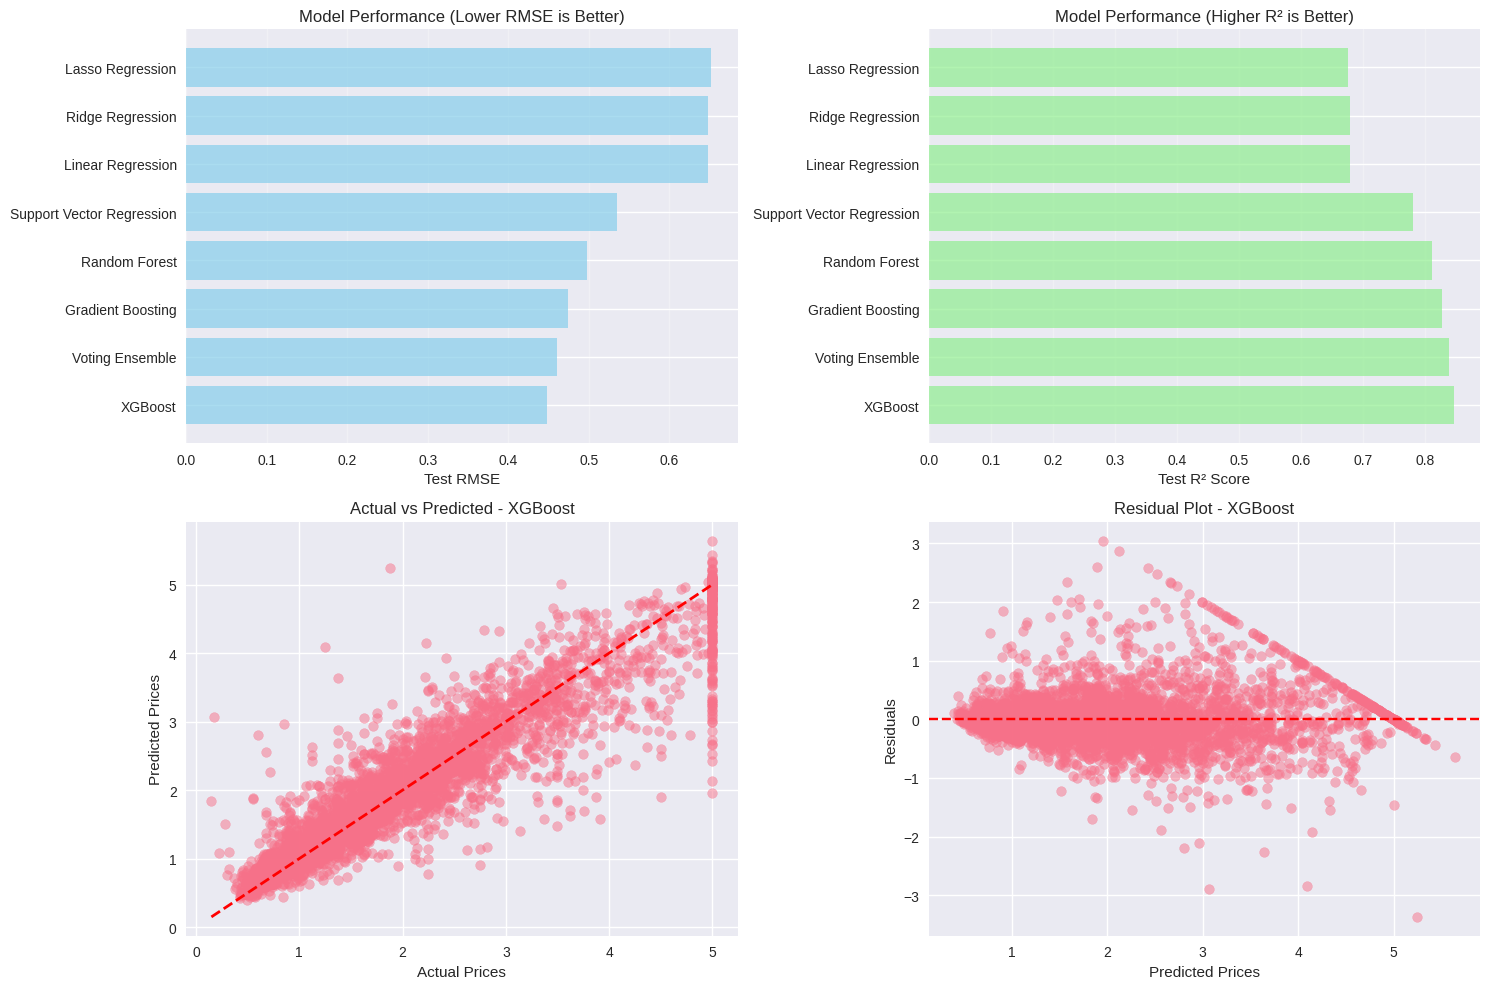


🏆 BEST PERFORMING MODEL: XGBoost
   Test RMSE: 0.4487
   Test MAE: 0.2908
   Test R²: 0.8463

💾 Saving best model and preprocessing objects...
✅ Model development completed!
🎯 Best model saved: XGBoost
📈 Final test performance: RMSE = 0.4487


In [13]:
# Step 4.1: Import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("🤖 Starting Model Development...")

# Step 4.2: Prepare final dataset for modeling
# Separate features and target
X_final = X_engineered.copy()
y_final = df_engineered['MedHouseVal'].copy()

print(f"Final dataset shape: {X_final.shape}")

# Step 4.3: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Step 4.4: Feature scaling
print("\n⚖️ Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_final.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_final.columns, index=X_test.index)

# Step 4.5: Initialize models
print("\n🔄 Initializing regression models...")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, n_jobs=-1),
    'Support Vector Regression': SVR()
}

# Step 4.6: Define hyperparameter grids for tuning
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6],
        'subsample': [0.8, 1.0]
    },
    'Support Vector Regression': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['rbf', 'linear']
    }
}

# Step 4.7: Train and evaluate models with cross-validation
print("\n🎯 Training and Evaluating Models...")
print("="*70)

model_results = {}
best_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in param_grids:
        # Perform GridSearchCV for models with hyperparameters
        grid_search = GridSearchCV(
            model, param_grids[name], 
            cv=5, scoring='neg_mean_squared_error', 
            n_jobs=-1, verbose=0
        )
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        best_models[name] = best_model
        print(f"  Best params: {grid_search.best_params_}")
    else:
        # For simple models without hyperparameters
        best_model = model
        best_model.fit(X_train_scaled, y_train)
        best_models[name] = best_model
    
    # Cross-validation scores
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, 
                               cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    
    # Predictions
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    model_results[name] = {
        'model': best_model,
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"  CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test R²: {test_r2:.4f}")

# Step 4.8: Create ensemble models
print("\n🌟 Building Ensemble Models...")

# Create a voting regressor with top performing models
top_models = {
    'Random Forest': best_models['Random Forest'],
    'XGBoost': best_models['XGBoost'],
    'Gradient Boosting': best_models['Gradient Boosting']
}

voting_regressor = VotingRegressor(
    estimators=[(name, model) for name, model in top_models.items()],
    n_jobs=-1
)

voting_regressor.fit(X_train_scaled, y_train)

# Evaluate voting regressor
y_pred_voting = voting_regressor.predict(X_test_scaled)
voting_rmse = np.sqrt(mean_squared_error(y_test, y_pred_voting))
voting_r2 = r2_score(y_test, y_pred_voting)

model_results['Voting Ensemble'] = {
    'model': voting_regressor,
    'cv_rmse_mean': None,
    'cv_rmse_std': None,
    'train_rmse': None,
    'test_rmse': voting_rmse,
    'train_mae': None,
    'test_mae': mean_absolute_error(y_test, y_pred_voting),
    'train_r2': None,
    'test_r2': voting_r2
}

print(f"Voting Ensemble - Test RMSE: {voting_rmse:.4f}, R²: {voting_r2:.4f}")

# Step 4.9: Compare all models
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'CV RMSE': [results['cv_rmse_mean'] if results['cv_rmse_mean'] else np.nan 
                for results in model_results.values()],
    'Test RMSE': [results['test_rmse'] for results in model_results.values()],
    'Test MAE': [results['test_mae'] for results in model_results.values()],
    'Test R²': [results['test_r2'] for results in model_results.values()]
}).sort_values('Test RMSE')

print(results_df.round(4))

# Step 4.10: Visualize model performance
print("\n📊 Visualizing Model Performance...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RMSE Comparison
models_list = results_df['Model'].values
test_rmse_values = results_df['Test RMSE'].values

axes[0,0].barh(models_list, test_rmse_values, color='skyblue', alpha=0.7)
axes[0,0].set_xlabel('Test RMSE')
axes[0,0].set_title('Model Performance (Lower RMSE is Better)')
axes[0,0].grid(axis='x', alpha=0.3)

# R² Comparison
test_r2_values = results_df['Test R²'].values
axes[0,1].barh(models_list, test_r2_values, color='lightgreen', alpha=0.7)
axes[0,1].set_xlabel('Test R² Score')
axes[0,1].set_title('Model Performance (Higher R² is Better)')
axes[0,1].grid(axis='x', alpha=0.3)

# Actual vs Predicted for best model
best_model_name = results_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
y_pred_best = best_model.predict(X_test_scaled)

axes[1,0].scatter(y_test, y_pred_best, alpha=0.5)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Prices')
axes[1,0].set_ylabel('Predicted Prices')
axes[1,0].set_title(f'Actual vs Predicted - {best_model_name}')

# Residual plot
residuals = y_test - y_pred_best
axes[1,1].scatter(y_pred_best, residuals, alpha=0.5)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Prices')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title(f'Residual Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# Step 4.11: Identify best model
best_model_info = model_results[best_model_name]
print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Test RMSE: {best_model_info['test_rmse']:.4f}")
print(f"   Test MAE: {best_model_info['test_mae']:.4f}")
print(f"   Test R²: {best_model_info['test_r2']:.4f}")

# Step 4.12: Save the best model and scaler
import joblib

print("\n💾 Saving best model and preprocessing objects...")
joblib.dump(best_model, 'best_house_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')

print("✅ Model development completed!")
print(f"🎯 Best model saved: {best_model_name}")
print(f"📈 Final test performance: RMSE = {best_model_info['test_rmse']:.4f}")

🔍 Interpreting Model with SHAP Values...
✅ SHAP values calculated

📊 Analyzing Feature Importance...

Top 10 Most Important Features:
                     feature  importance
14           income_per_room      0.3233
0                     MedInc      0.1548
5               AveOccup_win      0.0750
19    income_age_interaction      0.0637
12         coastal_proximity      0.0481
9                 dist_to_SF      0.0448
18  income_rooms_interaction      0.0429
8                 dist_to_LA      0.0363
6                   Latitude      0.0363
7                  Longitude      0.0352

📈 Creating SHAP Visualizations...


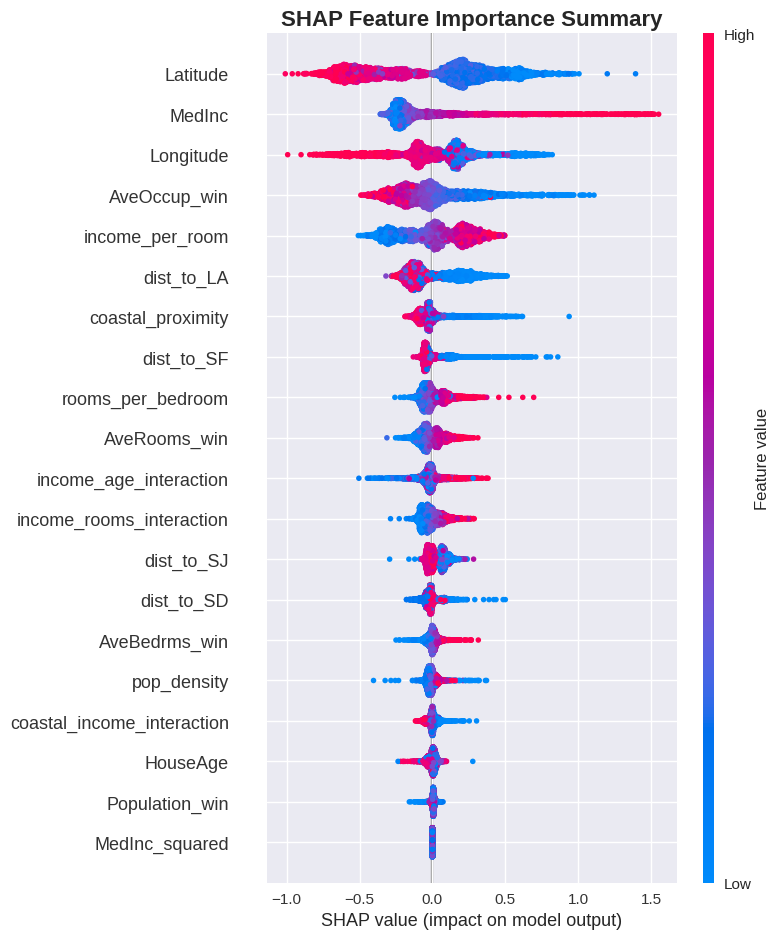

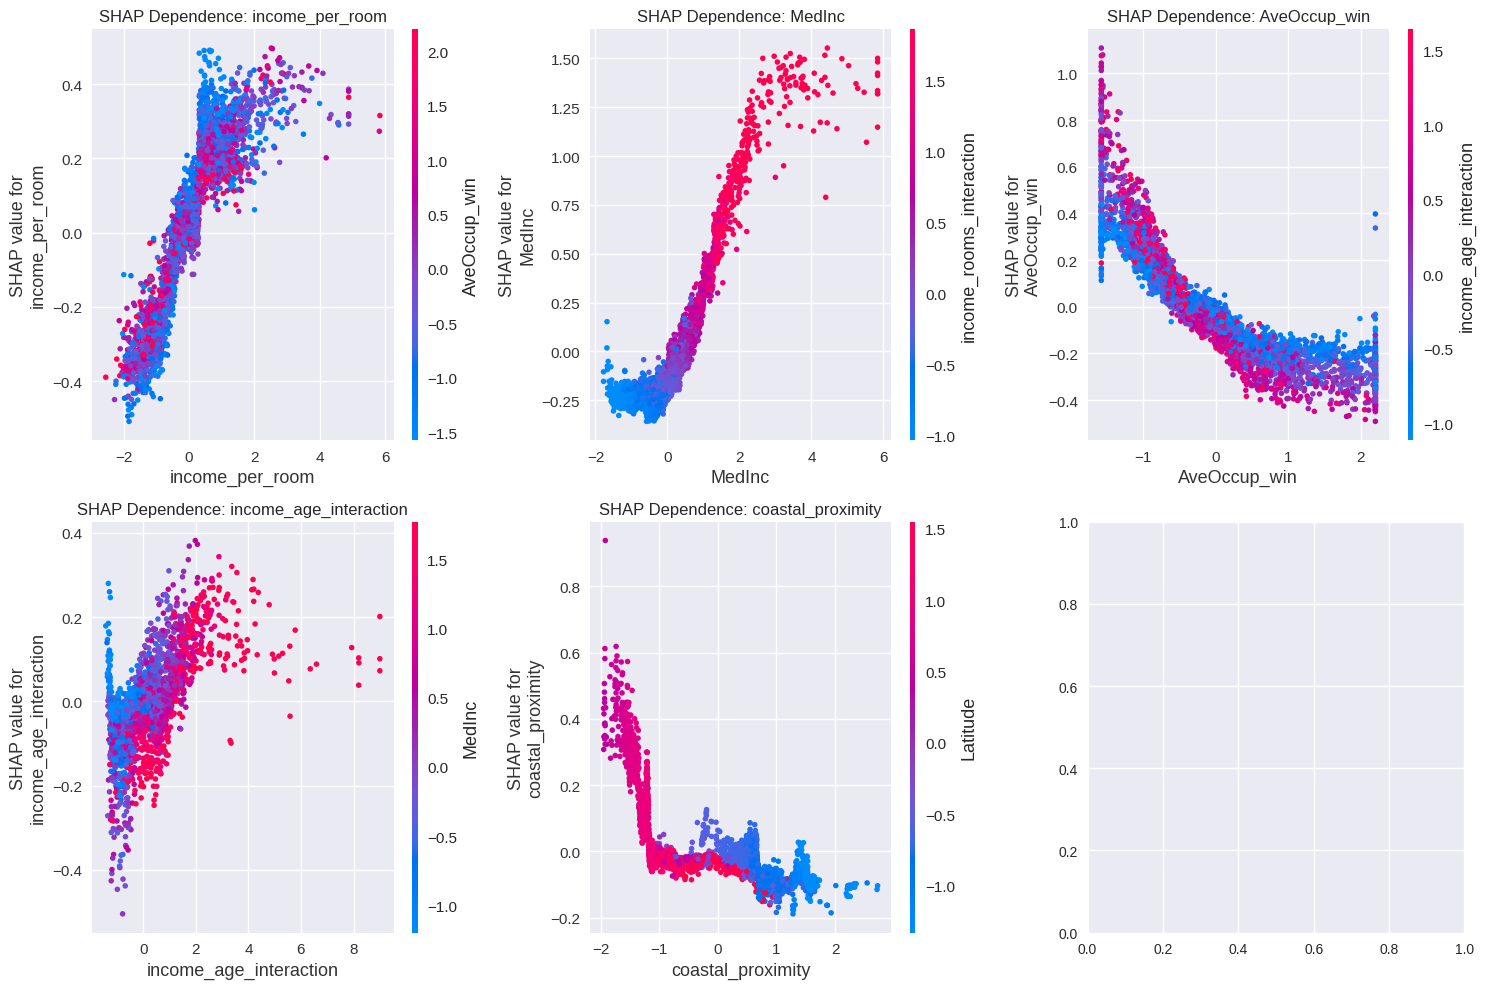


🎯 Creating Individual Prediction Explanations...

Sample Prediction Explanations:

Sample 1:
  Actual: $47,700
  Predicted: $49,100
  Error: $1,400
  Top contributing features:
    - Latitude: decreases price by $39,839
    - income_per_room: decreases price by $32,339
    - MedInc: decreases price by $24,290

Sample 2:
  Actual: $99,700
  Predicted: $141,727
  Error: $42,027
  Top contributing features:
    - Longitude: decreases price by $31,559
    - AveOccup_win: increases price by $22,387
    - MedInc: decreases price by $22,057

Sample 3:
  Actual: $119,400
  Predicted: $205,711
  Error: $86,311
  Top contributing features:
    - Latitude: decreases price by $43,743
    - MedInc: decreases price by $25,657
    - AveOccup_win: increases price by $25,643

Sample 4:
  Actual: $170,500
  Predicted: $177,645
  Error: $7,145
  Top contributing features:
    - AveOccup_win: decreases price by $35,003
    - Latitude: increases price by $24,253
    - dist_to_LA: increases price by $24,10

In [14]:
# Step 5.1: Model Interpretation with SHAP
print("🔍 Interpreting Model with SHAP Values...")

import shap

# Load the best model
best_model = joblib.load('best_house_price_model.pkl')

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)

print("✅ SHAP values calculated")

# Step 5.2: Feature importance analysis
print("\n📊 Analyzing Feature Importance...")

# Get feature importance from XGBoost
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_final.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10).round(4))

# Step 5.3: SHAP summary plot
print("\n📈 Creating SHAP Visualizations...")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_final.columns, show=False)
plt.title('SHAP Feature Importance Summary', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Step 5.4: Detailed SHAP analysis for top features
top_features = feature_importance_df.head(5)['feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features[:6]):
    if i < 6:
        shap.dependence_plot(feature, shap_values, X_test_scaled, 
                           feature_names=X_final.columns, ax=axes[i], show=False)
        axes[i].set_title(f'SHAP Dependence: {feature}')

plt.tight_layout()
plt.show()

# Step 5.5: Create individual prediction explanations
print("\n🎯 Creating Individual Prediction Explanations...")

# Select a few test cases to explain
sample_indices = [0, 100, 500, 1000]
sample_predictions = []

for idx in sample_indices:
    actual_price = y_test.iloc[idx]
    predicted_price = best_model.predict(X_test_scaled.iloc[idx:idx+1])[0]
    
    # Get SHAP values for this prediction
    shap_value_single = shap_values[idx]
    base_value = explainer.expected_value
    
    # Get top contributing features
    contribution_df = pd.DataFrame({
        'feature': X_final.columns,
        'shap_value': shap_value_single,
        'feature_value': X_test_scaled.iloc[idx].values
    })
    contribution_df['abs_contribution'] = np.abs(contribution_df['shap_value'])
    top_contributors = contribution_df.nlargest(3, 'abs_contribution')
    
    sample_predictions.append({
        'actual': actual_price,
        'predicted': predicted_price,
        'error': abs(actual_price - predicted_price),
        'top_contributors': top_contributors
    })

print("\nSample Prediction Explanations:")
for i, pred in enumerate(sample_predictions):
    print(f"\nSample {i+1}:")
    print(f"  Actual: ${pred['actual']*100000:,.0f}")
    print(f"  Predicted: ${pred['predicted']*100000:,.0f}")
    print(f"  Error: ${pred['error']*100000:,.0f}")
    print("  Top contributing features:")
    for _, row in pred['top_contributors'].iterrows():
        direction = "increases" if row['shap_value'] > 0 else "decreases"
        print(f"    - {row['feature']}: {direction} price by ${abs(row['shap_value'])*100000:,.0f}")

